## Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import  stats
import seaborn as sns; sns.set()

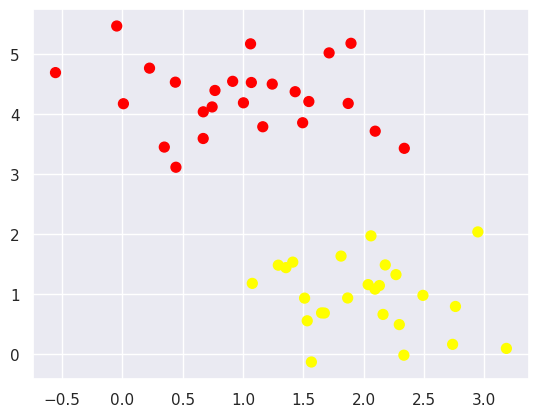

In [2]:
from sklearn.datasets._samples_generator import  make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

(-1.0, 3.5)

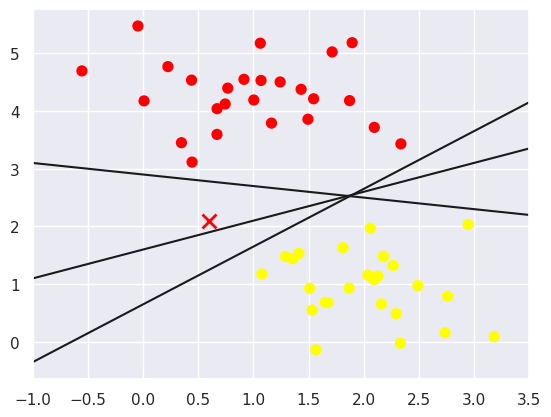

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plt.plot([0.6], [2.1], "x", color="red", markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, "-k")

plt.xlim(-1, 3.5)

#### 最大化邊界
在每條線上畫具有一些寬度的邊界直到最近的點，而非只畫一條寬度為0的線

(-1.0, 3.5)

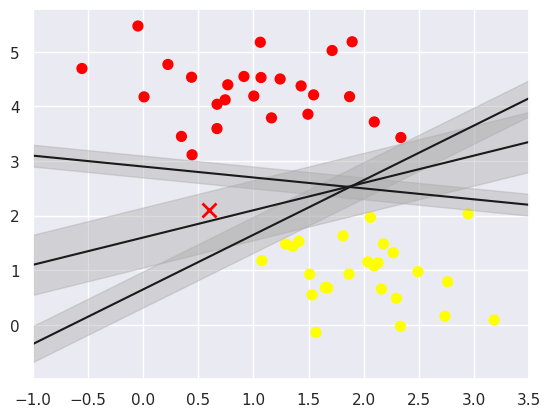

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plt.plot([0.6], [2.1], "x", color="red", markeredgewidth=2, markersize=10)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor="none", color="#AAAAAA", alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import  SVC # Support Vector Classifier
model = SVC(kernel="linear", C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_sve_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC."""
    if not ax:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # 建立grid評估模型
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 繪出決策邊界
    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

    # 繪出支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors="none", edgecolors="k")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

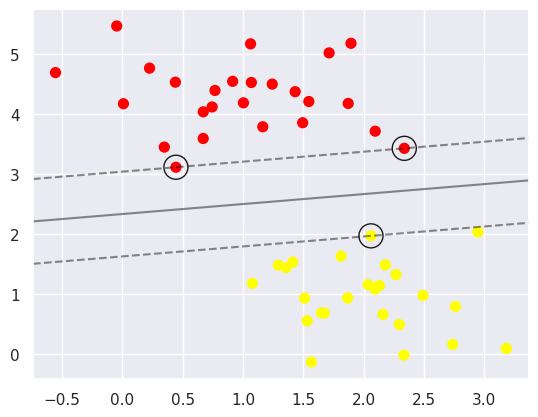

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_sve_decision_function(model)

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_sve_decision_function(model, ax)

<Axes: >

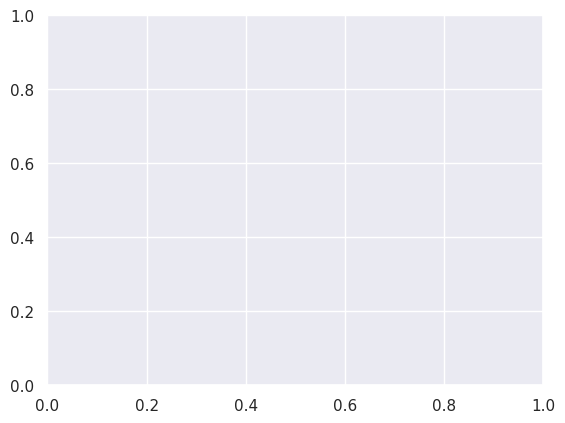

In [10]:
ax = None
ax or plt.gca()

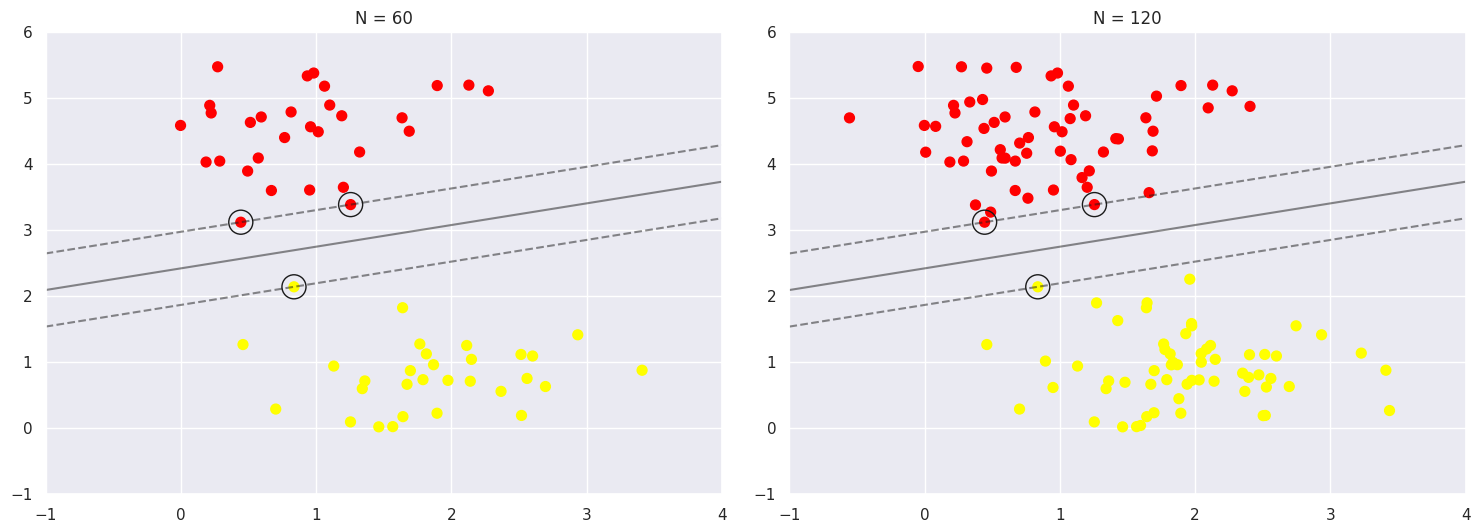

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title(f"N = {N}")

### Kernel SVM

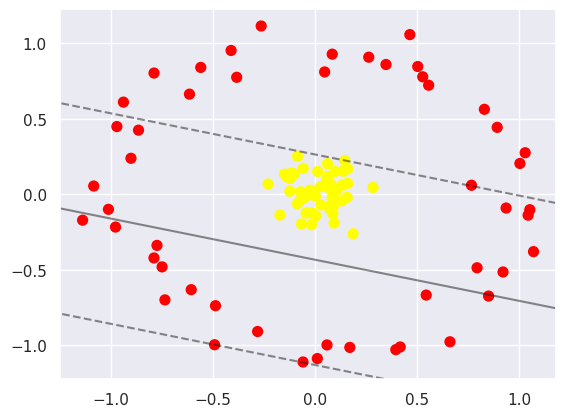

In [12]:
from sklearn.datasets._samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel="linear").fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_sve_decision_function(clf, plot_support=False)

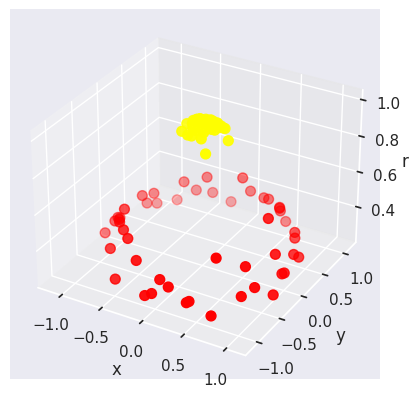

In [13]:
### radial basis function

r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(X, y):
    ax = plt.subplot(projection="3d")
    ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap="autumn")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    ax.zaxis.labelpad=-0.8


plot_3D(X=X, y=y)


In [14]:
# rbf: radial basis function
clf = SVC(kernel="rbf", C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

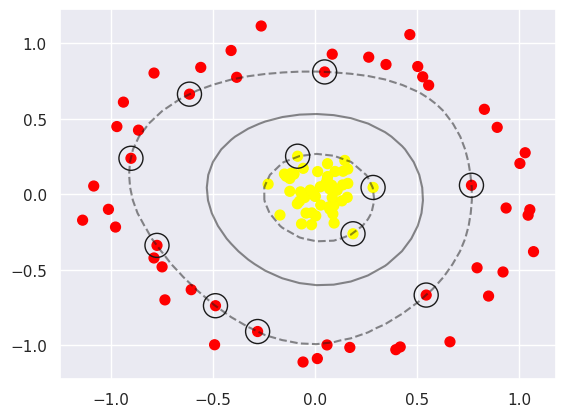

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_sve_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors="none")

#### 柔化邊界
- fudge_factor(模糊因子): 邊角銳利程度由C參數調整
    - C越大，邊角就越銳利，以致資料點不能在邊界上
    - C越小，邊角越柔和，允許邊界成長到包含一些資料點

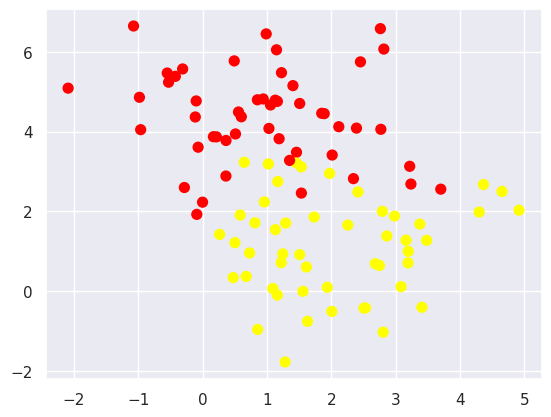

In [16]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

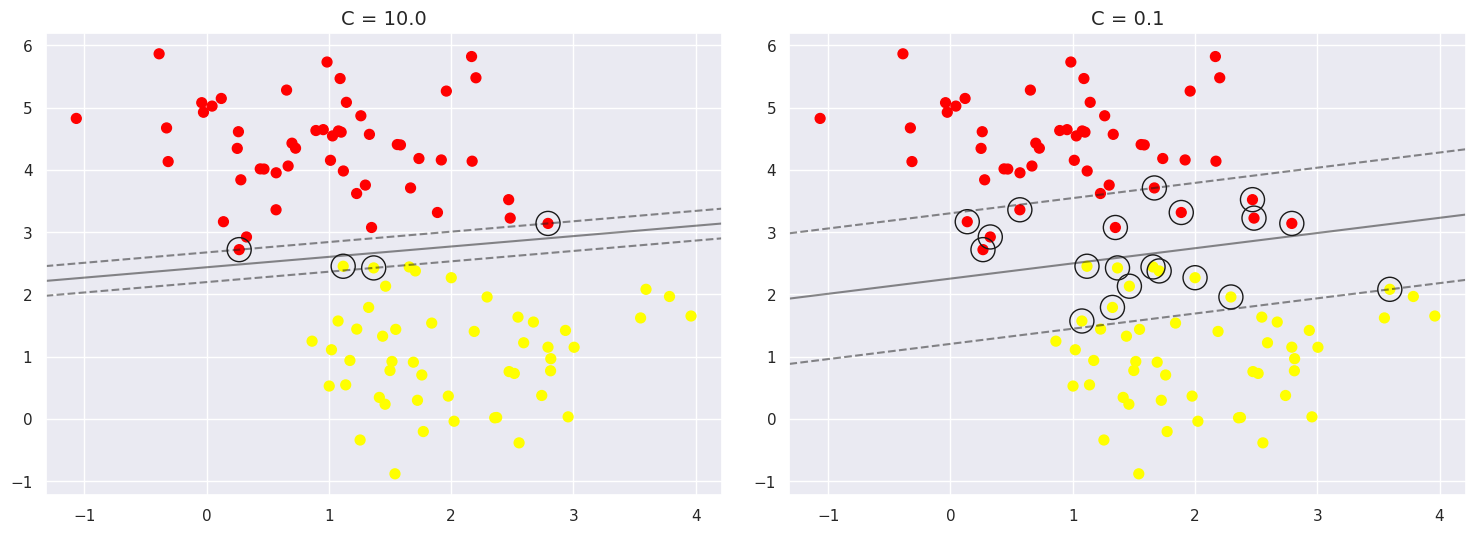

In [17]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

    plot_sve_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors="none")
    axi.set_title(f"C = {C:.1f}", size=14)

### 人臉辨識

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)


In [19]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


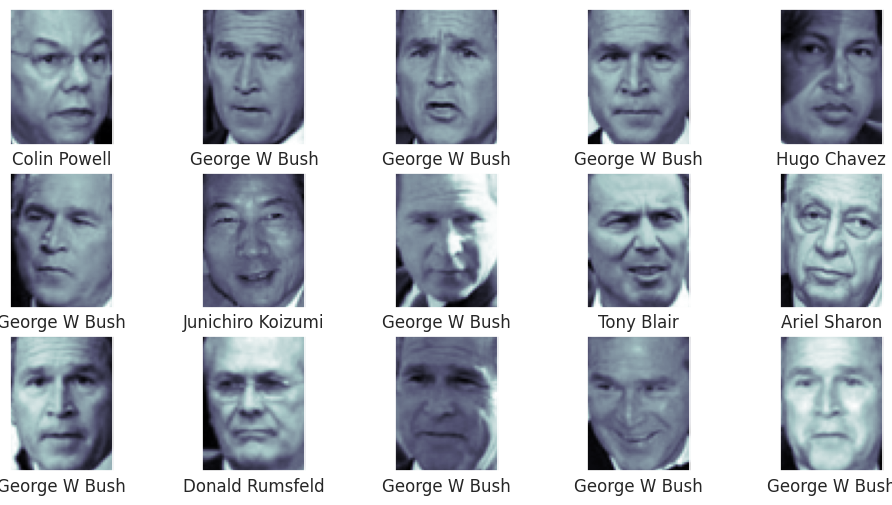

In [21]:
fig, ax = plt.subplots(3, 5, figsize=(12, 6))
for i, axi, in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="bone")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)


In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "svc__C": [1, 5, 10, 50],
    "svc__gamma": [0.0001, 0.0005, 0.001, 0.005] # radial basis function kernel的大小
}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 5min 6s, sys: 3min 23s, total: 8min 30s
Wall time: 1min 8s
{'svc__C': 5, 'svc__gamma': 0.001}


In [25]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

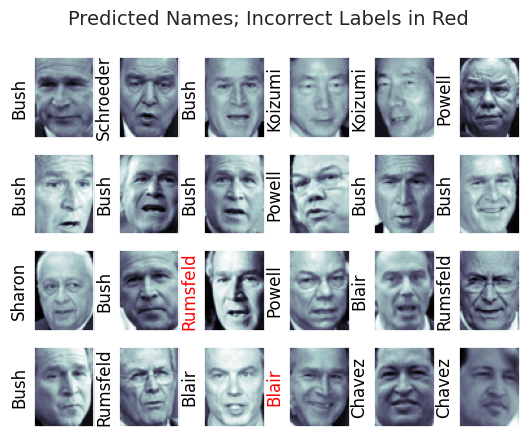

In [28]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap="bone")
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color="black" if yfit[i] == ytest[i] else "red")
    fig.suptitle("Predicted Names; Incorrect Labels in Red", size=14)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                      target_names=faces.target_names)) # print for formatting(render \n)

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(109.44999999999996, 0.5, 'predicted label')

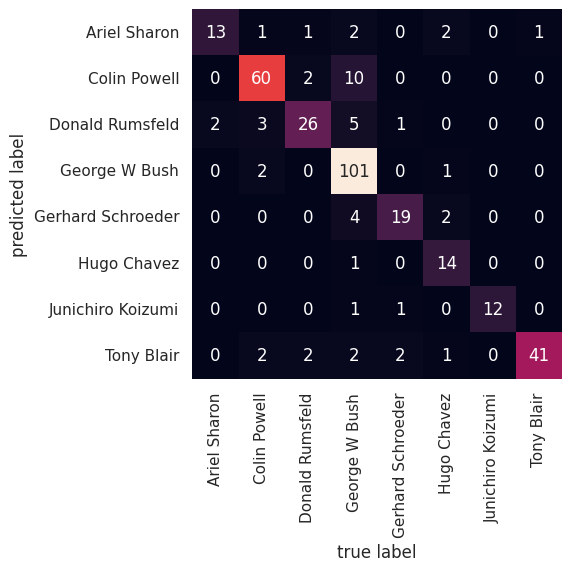

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")

- 優點:
    - 依賴相對少的支持向量，使用較少記憶體
    - 預測階段速度非常快
    - 可在高維度資料中運作良好，甚至包括維度比樣本數多的資料
    - 與核方法整合非常多樣化，能夠適應許多型態資料
- 缺點:
    - 樣本數N執行效能估計，最糟為$O[N^{3}]$，最有效率時為$O[N^{2}]$，訓練成本高
    - 結果非常依賴柔化參數C
    - 沒有一個直接的機率學理解釋